In [2]:
%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [116]:
os.chdir("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\")
dataframe=pd.DataFrame()
for file in os.listdir():
	df=pd.read_csv("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\{}".format(file),
		names=[i for i in range(400)],
		engine="python")
	dataframe=dataframe.append(df)
dataframe=dataframe.drop(labels=dataframe.columns[12:],axis=1)
dataframe=dataframe.drop_duplicates(0)
dataframe=dataframe.set_index(keys=pd.Index([i for i in range(dataframe.shape[0])]))
dataframe=dataframe.drop(labels=np.where(dataframe.iloc[:,11] == "-")[0][0],axis=0)
dataframe.iloc[:,11]=dataframe.iloc[:,11].astype(float)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1168090971,Vilella M. M.,Andreozzi G.,13.09.2018 13:05,4.0,6.0,3.0,6.0,NaN,NaN,2.65,1.42
1,-803211511,Davidovich Fokina A.,Andreozzi G.,16.09.2018 12:10,4.0,6.0,6.0,4.0,3.0,6.0,2.32,1.55
2,-1535910362,Andreozzi G.,Cuevas M.,09.10.2018 17:10,6.0,7.0,6.0,2.0,6.0,3.0,1.37,2.85
3,-793910428,Andreozzi G.,Serdarusic N.,11.10.2018 16:10,6.0,7.0,4.0,6.0,NaN,NaN,1.27,3.40
4,-1226255578,Andreozzi G.,Dutra Da Silva R.,23.10.2018 17:40,4.0,6.0,6.0,1.0,1.0,0.0,1.60,2.19


In [117]:
dataframe=dataframe.dropna(axis=0,subset=[4,5])

In [5]:
second_set_more_gems = np.where(dataframe.iloc[:,[4,5]].sum(axis=1)
                                < dataframe.iloc[:,[6,7]].sum(axis=1),1,0)
lamak = np.where(((dataframe.iloc[:,4] > dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] > dataframe.iloc[:,6])) | 
                ((dataframe.iloc[:,4] < dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] < dataframe.iloc[:,6])),1,0)
three_sets = np.where(dataframe.iloc[:,8] == dataframe.iloc[:,8],1,0)
ssmg_high_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])),1,0)
ssmg_low_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])),1,0)
                        

print("TARGETS RATIO")
print("second_set_more_gems",np.unique(second_set_more_gems,return_counts=True)[1][1]
      /dataframe.shape[0])
print("lamak",np.unique(lamak,return_counts=True)[1][1]/dataframe.shape[0])
print("three_sets",np.unique(three_sets,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_low_odd",np.unique(ssmg_low_odd,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_high_odd",np.unique(ssmg_high_odd,return_counts=True)[1][1]/dataframe.shape[0])




TARGETS RATIO
second_set_more_gems 0.3789041095890411
lamak 0.33123287671232876
three_sets 0.36767123287671233
ssmg_low_odd 0.24767123287671233
ssmg_high_odd 0.36712328767123287


In [118]:
df=dataframe.iloc[:,[4,5,10,11]]
df.loc[:,4] = (df.loc[:,4])*100
#df.loc[:,5] = df.loc[:,5]-df.loc[:,4]
#df.loc[:,10] = (df.loc[:,10]-df.loc[:,11])
df = df.drop(11,axis=1)
#df.loc[:,4] = df.loc[:,4]+df.loc[:,5]
#df = df.drop(5,axis=1)

df.head()



,4,5,10
0,400.0,6.0,2.65
1,400.0,6.0,2.32
2,600.0,7.0,1.37
3,600.0,7.0,1.27
4,400.0,6.0,1.60


In [119]:
X_train,X_test,y_train,y_test=train_test_split(df,second_set_more_gems,test_size=0.25,
                                               stratify=second_set_more_gems)


In [120]:
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
test_pca = PCA()
test_pca.fit(X_train_std)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))

0.5525474803155003
0.8040234975226567
1.0000000000000002


<IPython.core.display.Javascript object>


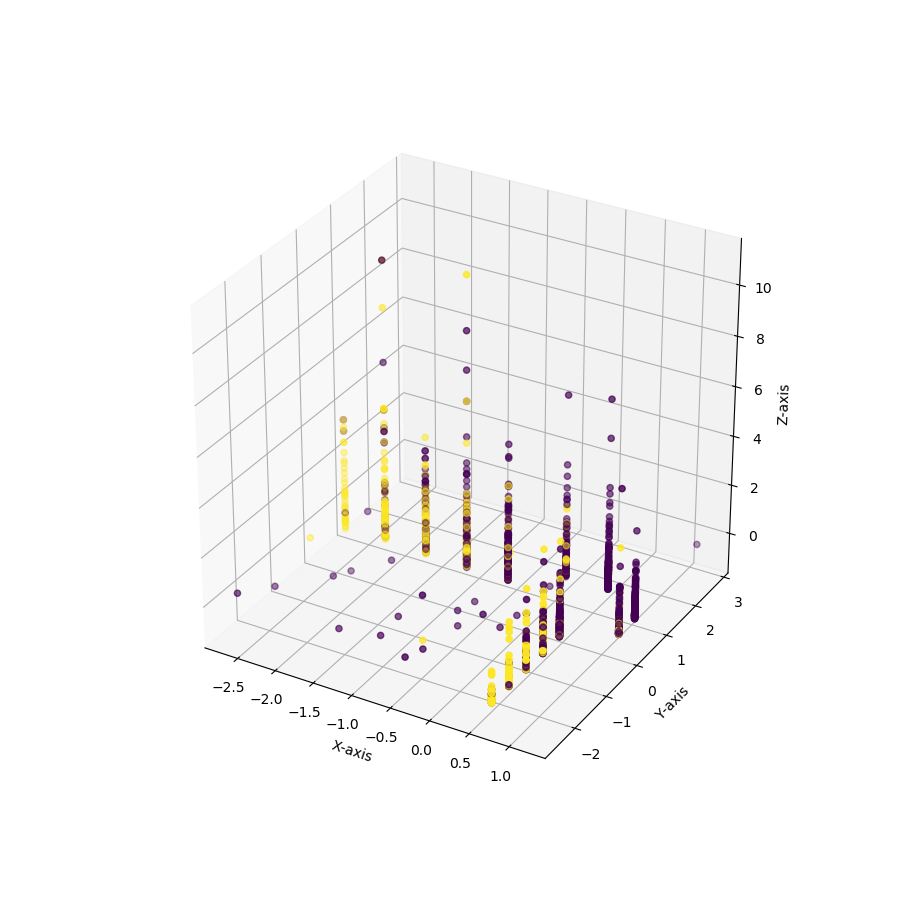

In [57]:
xplt = X_train_std
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


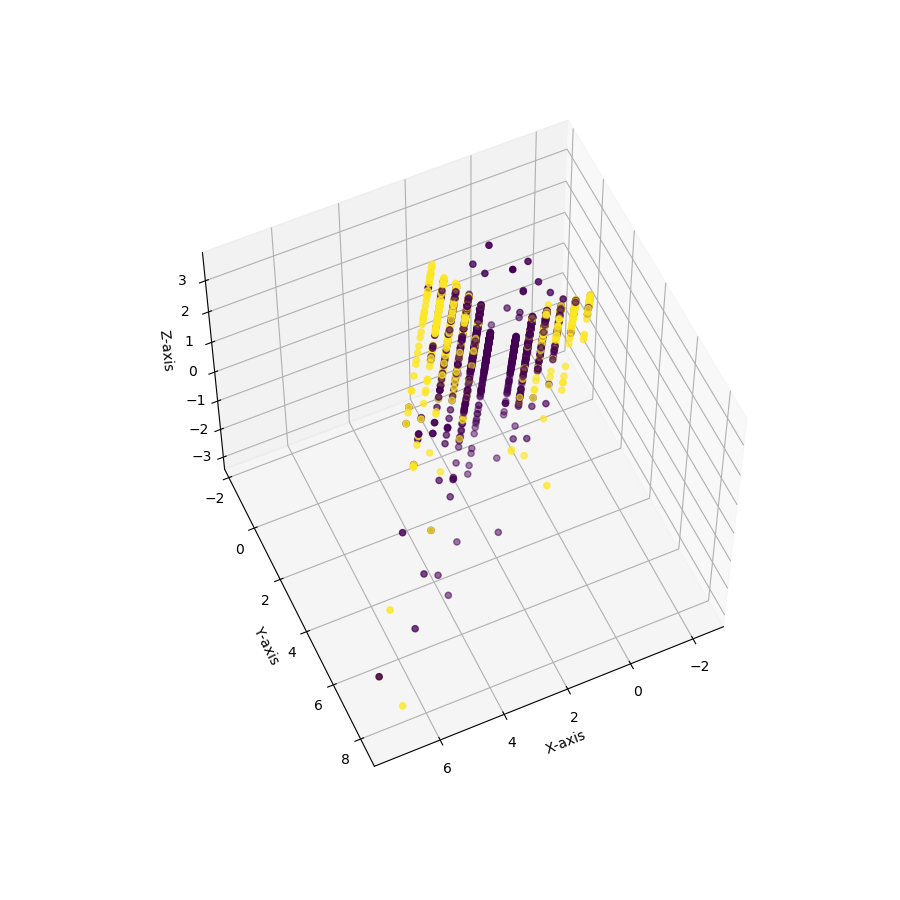

In [58]:
pca_3d = PCA(n_components=3)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
xplt = X_train_std_pca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


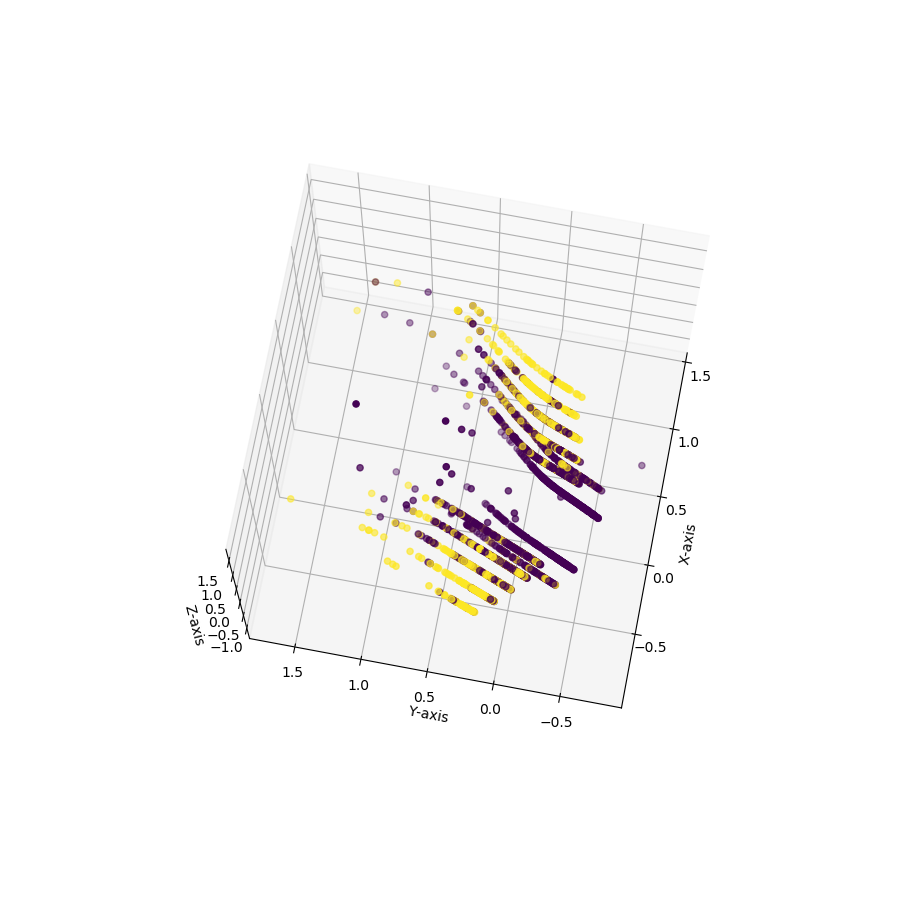

In [68]:
kpca_3d = KernelPCA(kernel="sigmoid",n_components=3)
X_train_std_kpca3d = kpca_3d.fit_transform(X_train_std)
xplt = X_train_std_kpca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


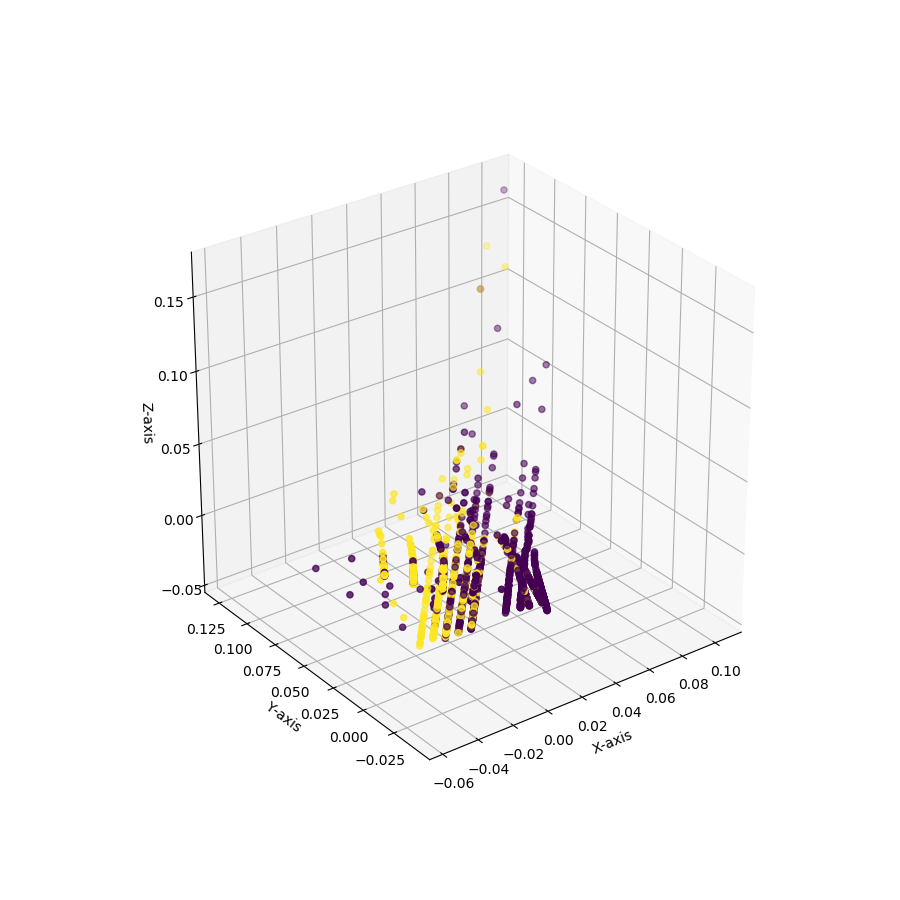

In [144]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=240)
x_train_std_lle = lle.fit_transform(X_train_std)
xplt = x_train_std_lle
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


In [69]:
pca_3d = PCA(n_components=3)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[0.00001,0.01,10,100],
"gamma":[0.00001,0.001,0.1,10]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_pca3d=GridSearchCV(SVC(max_iter=1000),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_pca3d.fit(X_train_std_pca3d,y_train)
print("BEST SCORE",grid_svc_std_pca3d.best_score_)
print("BEST PARAMS",grid_svc_std_pca3d.best_params_)

BEST SCORE 0.7486298867373036
BEST PARAMS {'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [72]:
kpca_3d = KernelPCA(kernel="sigmoid",n_components=3)
X_train_std_kpca3d = kpca_3d.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[0.00001,0.01,10,100],
"gamma":[0.001,0.1,10,50]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_kpca3d=GridSearchCV(SVC(max_iter=1000),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_kpca3d.fit(X_train_std_kpca3d,y_train)
print("BEST SCORE",grid_svc_std_kpca3d.best_score_)
print("BEST PARAMS",grid_svc_std_kpca3d.best_params_)

BEST SCORE 0.753014249177932
BEST PARAMS {'C': 10, 'gamma': 50, 'kernel': 'rbf'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [74]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=70)
x_train_std_lle = lle.fit_transform(X_train_std)
paramgrid_svc_std=[{"kernel":["rbf"],
"C":[300,500,1000],
"gamma":[0.1,10,40,80,300]},
{"kernel":["poly"],
"gamma":[0.00001,0.0001,0.001,0.01,0.1,1,10],
"C":[0.00001,0.01,10,100],
"degree":[2,3]},
{"kernel":["linear"],
"C":[0.00001,0.01,10,100],
}]
grid_svc_std_lle=GridSearchCV(SVC(),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid_svc_std_lle.fit(x_train_std_lle,y_train)
print("BEST SCORE",grid_svc_std_lle.best_score_)
print("BEST PARAMS",grid_svc_std_lle.best_params_)

BEST SCORE 0.7497259773474607
BEST PARAMS {'C': 500, 'gamma': 80, 'kernel': 'rbf'}


In [138]:
df2=dataframe.iloc[:,[4,5,10,11]]
df2.loc[:,4] = (df2.loc[:,4]+1)/(df2.loc[:,4]+df2.loc[:,5]+1)
df2.loc[:,5] = (df2.loc[:,5]+1)/(df2.loc[:,4]+df2.loc[:,5]+1)
#df.loc[:,5] = df.loc[:,5]-df.loc[:,4]
df2.loc[:,10] = (df2.loc[:,10]-df2.loc[:,11])
df2 = df2.drop(11,axis=1)
#df.loc[:,4] = df.loc[:,4]+df.loc[:,5]
#df = df.drop(5,axis=1)


df2.head()

c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,4,5,10
0,0.454545,0.939024,1.23
1,0.454545,0.939024,0.77
2,0.500000,0.941176,-1.48
3,0.500000,0.941176,-2.13
4,0.454545,0.939024,-0.59


In [139]:
X_train2,X_test2,y_train2,y_test2=train_test_split(df2,second_set_more_gems,test_size=0.25,
                                               stratify=second_set_more_gems)

In [140]:
sc2=StandardScaler()
X_train_std2 = sc2.fit_transform(X_train2)
X_test_std2 = sc2.transform(X_test2)
test_pca = PCA()
test_pca.fit(X_train_std2)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))

0.6993821424954921
0.9598083925427611
1.0


<IPython.core.display.Javascript object>


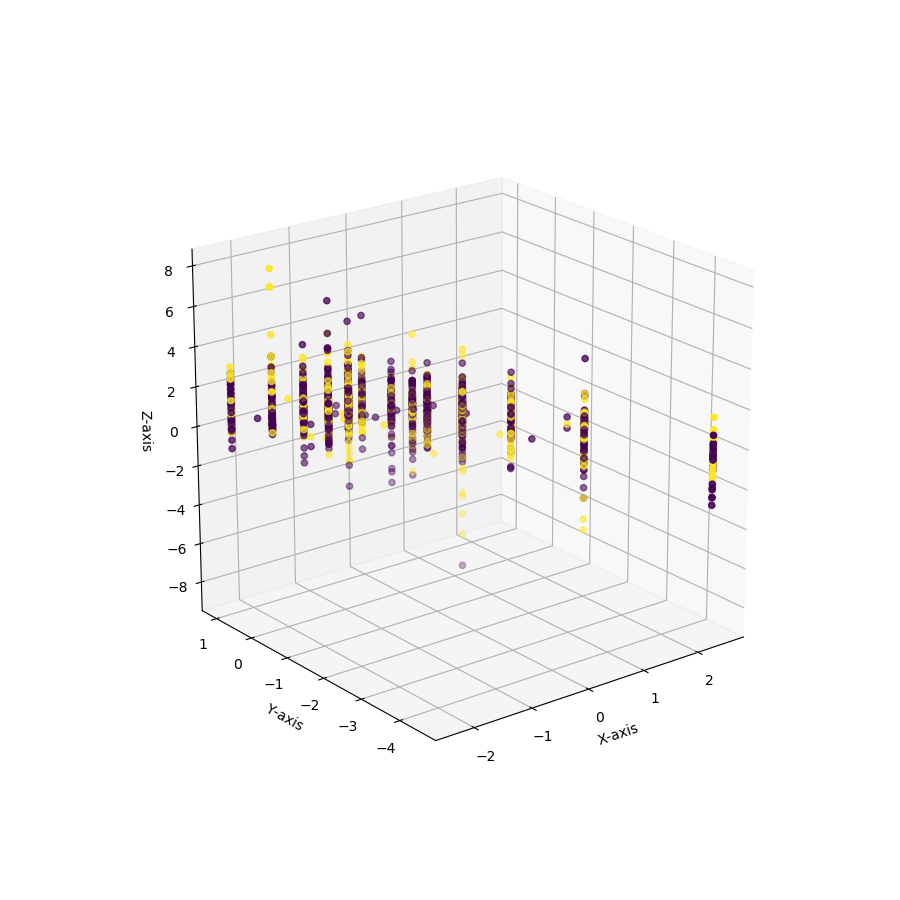

In [141]:
xplt = X_train_std2
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


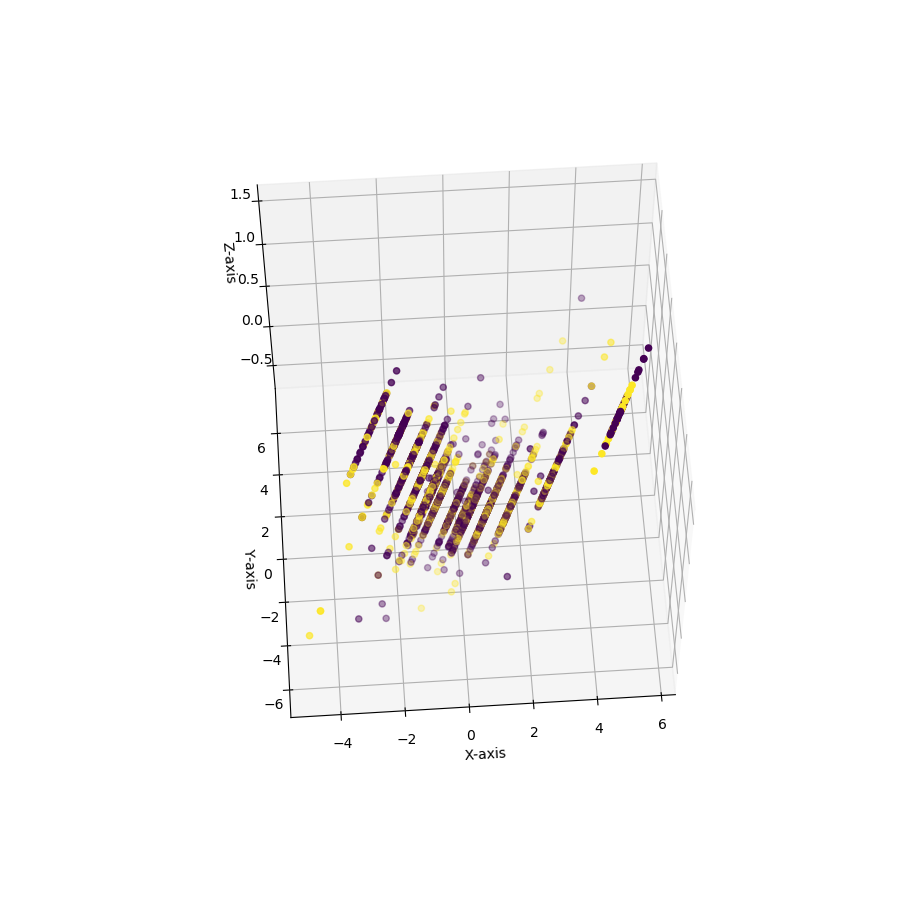

In [142]:
pca_3d2 = PCA(n_components=3)
X_train_std_pca3d2 = pca_3d2.fit_transform(X_train_std2)
xplt = X_train_std_pca3d2
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()